<a href="https://colab.research.google.com/github/russellw999/PyTorch-Tutorial-YouTube-Codemy/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Video 14 Convoluted neural Network - Import MNIST Images - Deep Learning

In [1]:
from io import IncrementalNewlineDecoder
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [2]:
# Images are 2 D but we need extra dimensions
# Convert MNIS Image Files into a TENSOR OF 4-dimensions ( # of images, Height, Width, Color Channel)
transform = transforms.ToTensor()


In [3]:
# Train Data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.26MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 154kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.32MB/s]


In [4]:
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [17]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [18]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [23]:
# End of of Video 14 -
#.  set up the CNN, Imported required libraries, created a transform to change the images to a 4 D tensor
#   set up the training data downloaed and installed, set up the test data



In [24]:
# Video 15 Build the CNN

# Create a small batch size for images...let's say 10
train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

In [25]:
# Define Our CNN Model
# Describe convolutional layer and what it's doing ( 2 convolutional layers)
# This is just an example the next video will build out the model

#
# conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(3,3))
# conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(3,3))
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [28]:
# Grab 1 MNIS record/image
for i, (X_train, y_train) in enumerate(train_loader):
    break

In [29]:
X_train

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [30]:
X_train.shape

torch.Size([1, 1, 28, 28])

In [31]:
x = X_train.view(1,1,28,28)  # change to 4 dimensional.  1 batch of 1 image of 28 x 28
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [32]:
# Perform our first convolution
x = F.relu(conv1(x)) # Rectified Linear Unit for our activation function


In [33]:
# 1 single image, 6 is the filters we asked for, 26x26 is the image ( not 28x28 as the padding was removed)
x.shape

torch.Size([1, 6, 26, 26])

In [34]:
# pass thru the pooling layer

x = F.max_pool2d(x, 2, 2) # kernal of 2 and stride of 2

In [35]:
x.shape  # 26 / 2 = 13  (stride was set to 2 in previous step)

torch.Size([1, 6, 13, 13])

In [36]:
# Do our second convolutional layer.  (same x as its all linear one after the otehr)
x = F.relu(conv2(x))  #. conv2 is ( 6, 16, 3, 1)

In [37]:
x.shape   # Again we did not set padding so we lose 2 px around the outside of image

torch.Size([1, 16, 11, 11])

In [38]:
# Pooling layer
x = F.max_pool2d(x, 2, 2)

In [39]:
x.shape # 11/2 = 5.5 but we have to rounddown , because you can't invent data to round up

torch.Size([1, 16, 5, 5])

In [ ]:
# End of Video 15 - we have taken an image and passed it through 2 convolutions and poolings

Video 17 Builld a Model

In [40]:
# Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6, 16, 3,1)
    # Fully Connected Layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2,2)   # 2x2 kernal and stride 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2,2)   # 2x2 kernal and stride 2

    # Re-View to flatten out
    X = X.view(-1, 16*5*5)   # -1 one so that we can vary the batch size

    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)


In [41]:
# Create an Instance of our Model
torch.manual_seed(41)
model = ConvolutionalNetwork()

model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [42]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Smaller the Learning Rate, the longer it takes to train

In [43]:
# End of Video 16 Create model
# Start of Video 17 Train Data

In [44]:
import time
start_time = time.time()

# Create variables to Track Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#   For Loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
      b+=1
      # Apply our model
      y_pred = model(X_train)  # get the predicteds values from the training set, Not flattened 2D
      loss = criterion(y_pred, y_train) # how off are we? Compare the predictions to correct answers in Y_train

      predicted = torch.max(y_pred.data,1)[1] # add up the number of correct predictions. Indexed off the first point
      batch_correct = (predicted == y_train).sum() # how many we got correct from this batch. True = 1, False = 0, sum those up
      trn_corr += batch_correct # add up the number of correct predictions

      # Update our parameters
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


      # Print out some results
      if b%600 == 0:
        print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # Test
  with torch.no_grad():     # No gradient so we don't update our weights abd biases with test
      for b, (X_test, y_test) in enumerate(test_loader):
        y_val = model(X_test)
        predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
        tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
elapsed_time = current_time - start_time
print(f'Training Took: {elapsed_time/60}minutes!')

Epoch: 0  Batch: 600  Loss: 0.08787637948989868
Epoch: 0  Batch: 1200  Loss: 2.5110254287719727
Epoch: 0  Batch: 1800  Loss: 0.14741575717926025
Epoch: 0  Batch: 2400  Loss: 2.3756425380706787
Epoch: 0  Batch: 3000  Loss: 0.0034033493138849735
Epoch: 0  Batch: 3600  Loss: 0.060373492538928986
Epoch: 0  Batch: 4200  Loss: 0.0048146978951990604
Epoch: 0  Batch: 4800  Loss: 0.020903753116726875
Epoch: 0  Batch: 5400  Loss: 0.0005940818227827549
Epoch: 0  Batch: 6000  Loss: 0.0009480987209826708
Epoch: 0  Batch: 6600  Loss: 4.2676016164477915e-05
Epoch: 0  Batch: 7200  Loss: 0.002409889828413725
Epoch: 0  Batch: 7800  Loss: 1.811964830267243e-05
Epoch: 0  Batch: 8400  Loss: 0.00024172721896320581
Epoch: 0  Batch: 9000  Loss: 0.0003297977091278881
Epoch: 0  Batch: 9600  Loss: 0.0015156697481870651
Epoch: 0  Batch: 10200  Loss: 0.002953574061393738
Epoch: 0  Batch: 10800  Loss: 0.002577556297183037
Epoch: 0  Batch: 11400  Loss: 0.0009893052047118545
Epoch: 0  Batch: 12000  Loss: 0.0002147920

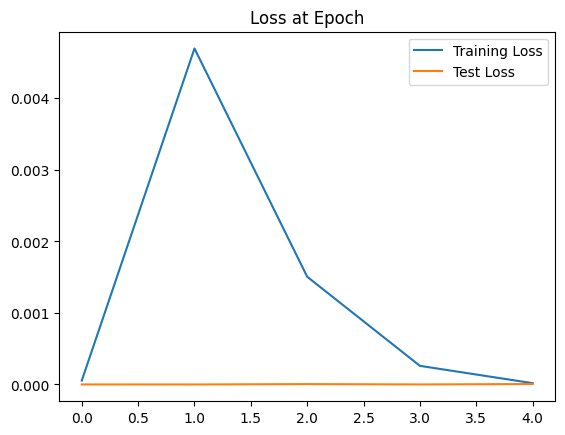

In [54]:
# Graph the Loss at epoch
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss at Epoch')
plt.legend()

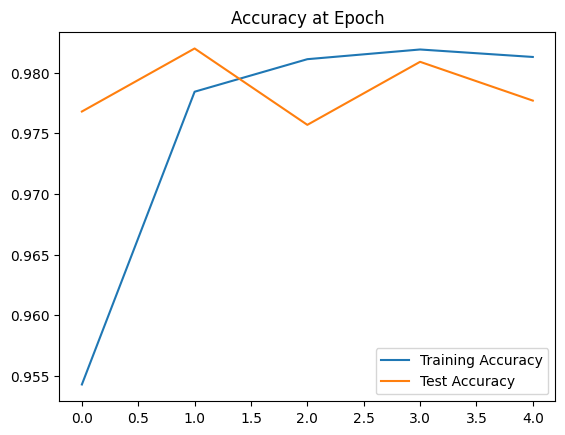

In [56]:
# graph the accuracy at the end of each epoch
plt.plot([t/len(train_loader.dataset) for t in train_correct], label='Training Accuracy')
plt.plot([t/len(test_loader.dataset) for t in test_correct], label='Test Accuracy')
plt.title('Accuracy at Epoch')
plt.legend()

In [58]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [59]:
with torch.no_grad():
  correct = 0
  for b, (X_test, y_test) in enumerate(test_load_everything):
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()
  print(f'Test Accuracy: {correct/len(test_load_everything.dataset)}')

Test Accuracy: 0.9776999950408936


In [60]:
correct.item()

9777